## Directed Graphs among Wikipedia Pages to which a Random Wikipedia Page Points through the Hyperlinks that it Includes
### By Moses A. Boudourides

* ### Here I am selecting a Wikipedia page through a random generator of wikipedia pages.
* ### However, one may start with a predifined Wikipedia page of one's own choice. In this case, one needs to modify Cell 7 below.
* ### Subsequently, the goal is to find the set of hyperlinks of the original (random) page to other Wikipedia webpages and the graph (directed network) which is formed by all the hyperlinks among the latter webpages. 
* ### To be able to controll the size of this graph, we are setting the minimum and the maximum number of hyperlinks from the original (random) page into a fixed interval of values (parameters n and N below).

In [1]:
# To install the wikipedia module, 
# you need to run the following (after commenting it out):

# !pip install wikipedia

In [2]:
# To install pygraphviz with conda, 
# you need to run the following IN A TERMINAL (after commenting it out):

# conda install -c alubbock pygraphviz

In [3]:
# To install pygraphviz with pip, 
# you need to run the following (after commenting it out):

# !pip install graphviz
# !pip install python-graphvis
# !pip install pygraphviz

In [4]:
import wikipedia
import random
import networkx as nx
import matplotlib.pyplot as plt
import pygraphviz
from networkx.drawing.nx_agraph import graphviz_layout
import warnings; warnings.simplefilter('ignore')

In [5]:
n=15  # minimum number of hyperlinks of the selected wikipedia page
N=31  # maximum number of hyperlinks of the selected wikipedia page

In [6]:
# If this cell runs very slowly, take lower values of n and N.

# while True:
#     try:
#         page=wikipedia.page(wikipedia.random())
#     except wikipedia.DisambiguationError as e:
#         pass
#     except wikipedia.exceptions.PageError as e:
#         pass
#     hl=sorted([w.replace(" ","_") for w in page.links])
#     if len(hl)>n and len(hl)<N:
#         break

# IF ONE WANTS TO USE A PREDEFINED WEBPAGE, 
# one should enter its name and comment out the next line

page=wikipedia.page('Michel_Serres') #'https://en.wikipedia.org/wiki/Michel_Serres'

p=sorted([w.replace(" ","_") for w in page.links])

print "The %i hyperlinks from the (randomly) selected '%s' Wikipedia page are:" %(len(p),page.title)
print
for i in range(len(p)):
    print "%i. %s" %(i+1,p[i])

The 236 hyperlinks from the (randomly) selected 'Michel Serres' Wikipedia page are:

1. Absurdism
2. Académie_française
3. Agen
4. Agrégation
5. Alain_Badiou
6. Albert,_4th_duc_de_Broglie
7. Albert_Camus
8. Alexandre_Kojève
9. Alexandre_Koyré
10. Alexis_de_Tocqueville
11. Alterity
12. André_François_Poncet
13. Angel
14. Angst
15. Antonio_Gramsci
16. Antonio_Negri
17. Apollonian_and_Dionysian
18. Arthur_Schopenhauer
19. Authenticity_(philosophy)
20. Being_in_itself
21. Benedetto_Croce
22. Biblioteca_Nacional_de_España
23. Bibliothèque_nationale_de_France
24. Bibsys
25. Boredom
26. Bruno_Latour
27. Carl_Schmitt
28. Centre_international_Jules-Verne
29. CiNii
30. Class_struggle
31. Claude_Louis_Hector_de_Villars
32. Claude_Lévi-Strauss
33. Contemporary_philosophy
34. Continental_philosophy
35. Cornelius_Castoriadis
36. Critical_theory
37. Criticism
38. Dan_David_Prize
39. Dasein
40. Death
41. Death_drive
42. Death_of_God
43. Deconstruction
44. Difference_(philosophy)
45. Différance
46. Dig

In [7]:
eds=[]
for pp in p:
    try:
        ppp=sorted([w.replace(" ","_") for w in wikipedia.page(pp).links])
    except wikipedia.exceptions.PageError as e:
        pass
    ih=set(ppp).intersection(set(p))
    if len(ih)>0:
#         print "%s has %i hyperlinks to webpages: \n %s" %(pp,len(ih),", ".join(list(ih)))
#         print
        for q in ih:
            eds.append((pp,q))

In [8]:
G=nx.DiGraph()
G.add_edges_from(eds)
print len(G.nodes()),len(G.edges())

# pos=graphviz_layout(G)

# # pos=nx.spring_layout(G,1.)

# plt.figure(figsize=(10,10));
# nodes = nx.draw_networkx_nodes(G, pos, node_color="g", alpha=0.2)
# nx.draw_networkx_edges(G, pos,arrowsize=20, edge_color="b", alpha=0.7)
# nx.draw_networkx_labels(G, pos)
# plt.axis('off');
# ss="The graph of the %i Wikipedia webpages which are \n hyperlinks of the Wikipedia page '%s'" %(len(G.nodes()),page.title)
# plt.title(ss,fontsize=15);
# plt.margins(x=0.3, y=0) 

236 17197


In [9]:
# In case you could not install pygraphviz, replace the command bellow:
# pos=graphviz_layout(G)
# by 
# pos=nx.spring_layout(G,k)
# where you set k equal to 1. or any float less or larger that 1.
# Try a few assignments of k until you find the plot that looks more satisfactory.

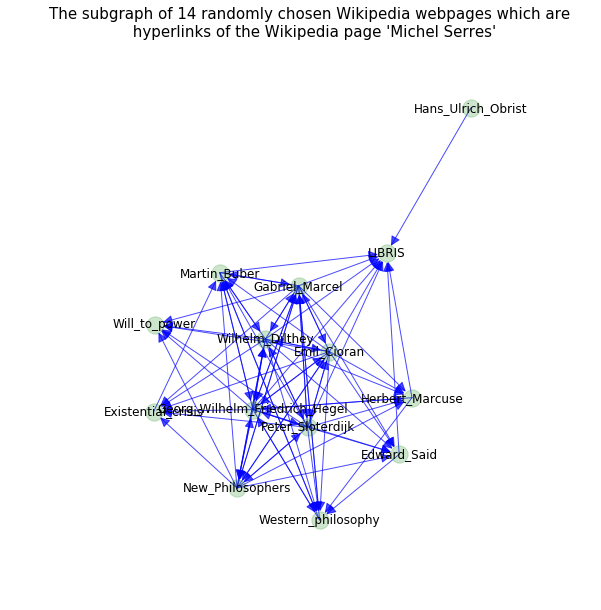

In [10]:
# Random Subgraphs

ss=15
sn=random.sample(list(G.nodes()),ss)
Gs=G.subgraph(sn)

uGs = nx.DiGraph(Gs)
uGs.remove_nodes_from(list(nx.isolates(uGs)))
# for n in list(nx.isolates(Gs)):
#     Gs.remove_node(n)

pos=graphviz_layout(uGs)

# pos=nx.spring_layout(uGs,1.)

plt.figure(figsize=(10,10));
nodes = nx.draw_networkx_nodes(uGs, pos, node_color="g", alpha=0.2)
nx.draw_networkx_edges(uGs, pos,arrowsize=20, edge_color="b", alpha=0.7)
nx.draw_networkx_labels(uGs, pos)
plt.axis('off');
ss="The subgraph of %i randomly chosen Wikipedia webpages which are \n hyperlinks of the Wikipedia page '%s'" %(len(uGs),page.title)
plt.title(ss,fontsize=15);
plt.margins(x=0.3, y=0.1) 